## 1. 导入库

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from scipy import interpolate

## 2. 读取数据

In [2]:
data = pd.read_csv('time.csv')

## 3. 两种插值函数

In [3]:
linear_func = interpolate.interp2d(data.lng, data.lat, data.time, kind='linear')
rbf_func = interpolate.Rbf(data.lng, data.lat, data.time)

In [4]:
# 生成数据
new_lng = np.linspace(data.lng.min(), data.lng.max(), 100)
new_lat = np.linspace(data.lat.min(), data.lat.max(), 100)
# linear
linear_time = linear_func(new_lng, new_lat)
# rbf
x, y = np.meshgrid(new_lng, new_lat)
rbf_time = rbf_func(x, y)

## 4. 结果绘图

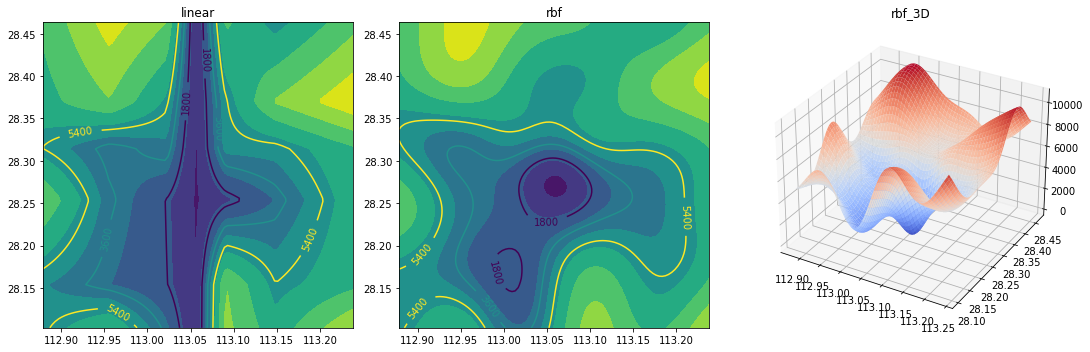

In [6]:
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(131)
ax1.contourf(new_lng, new_lat, linear_time)
contour1 = ax1.contour(new_lng, new_lat, linear_time, [1800, 3600, 5400])
ax1.clabel(contour1, fmt='%d')
plt.title('linear')

ax2 = plt.subplot(132)
ax2.contourf(new_lng, new_lat, rbf_time)
contour2 = ax2.contour(x, y, rbf_time, [1800, 3600, 5400])
ax2.clabel(contour2, fmt='%d')
plt.title('rbf')

ax3 = plt.subplot(133, projection='3d')
ax3.plot_surface(x, y, rbf_time, cmap=cm.coolwarm)
plt.title('rbf_3D')
plt.tight_layout()
plt.savefig('python_isochrone.png', dpi=300)